In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import gmean, gstd
%matplotlib inline

In [2]:
# Read the data from the CSV file
df = pd.read_csv('smps_may.csv', parse_dates=[['Date', 'Start Time']], dayfirst=True)
# Rename the combined column for clarity
df.rename(columns={'Date_Start Time': 'Timestamp'}, inplace=True)

# Extract hour and determine day/night
df['Hour'] = df['Timestamp'].dt.hour
df['Period'] = df['Hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

# Separate DataFrames for Day and Night
day_df = df[df['Period'] == 'Day']
night_df = df[df['Period'] == 'Night']

# Optionally save the separated DataFrames to new CSV files
day_df.to_csv('day_data_may.csv', index=False)
night_df.to_csv('night_data_may.csv', index=False)

In [3]:
data_day = pd.read_csv('day_data_may.csv')
data_night = pd.read_csv('night_data_may.csv')
data_day = data_day.drop(columns=['Hour', 'Period'])
data_night = data_night.drop(columns=['Hour', 'Period'])

In [4]:
df_day = pd.DataFrame(data_day)
df_day['Timestamp'] = pd.to_datetime(df_day['Timestamp'])
df_day['Date'] = df_day['Timestamp'].dt.date
df_day['Start Time'] = df_day['Timestamp'].dt.time
df_day.drop(columns=['Timestamp'], inplace=True)
df_day = df_day[['Date', 'Start Time'] + [col for col in df_day.columns if col not in ['Date', 'Start Time']]]
df_day.to_csv('day_data_may.csv', index=False)

In [5]:
df_night = pd.DataFrame(data_night)
df_night['Timestamp'] = pd.to_datetime(df_night['Timestamp'])
df_night['Date'] = df_night['Timestamp'].dt.date
df_night['Start Time'] = df_night['Timestamp'].dt.time
df_night.drop(columns=['Timestamp'], inplace=True)
df_night = df_night[['Date', 'Start Time'] + [col for col in df_night.columns if col not in ['Date', 'Start Time']]]
df_night.to_csv('night_data_may.csv', index=False)

In [6]:
# import pandas as pd
# df = pd.read_csv('smps_may.csv')
# df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# # Grouping data by day
# grouped = df.groupby(df['Date'].dt.date)

# # Saving each group (each day) to a separate CSV file
# for date, group in grouped:
#     # File name format: Day_Month_Year.csv
#     filename = f"{date.strftime('%d-%m-%Y')}.csv"
#     group.to_csv(filename, index=False)

# #print("Data has been split and saved by day.")

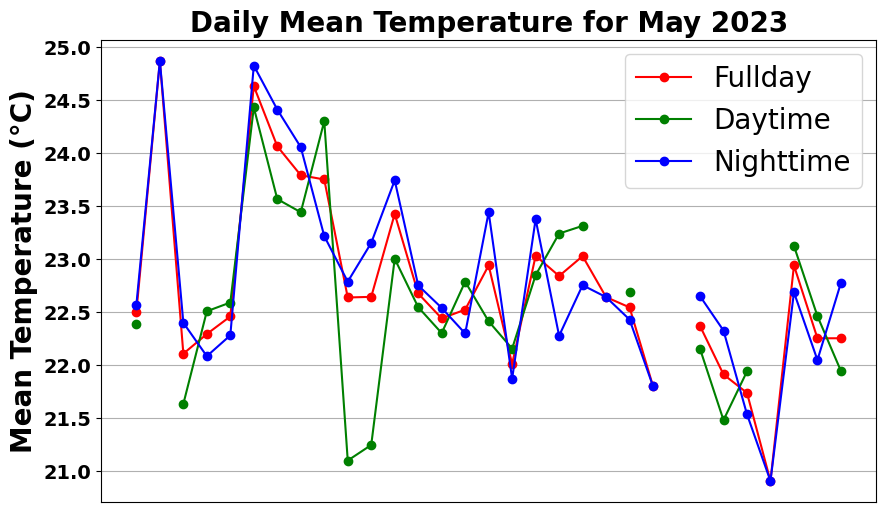

In [7]:
# File paths
total_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/smps_may.csv'
day_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/day_data_may.csv'
night_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/night_data_may.csv'

# Read the data and parse dates
df_total = pd.read_csv(total_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_day = pd.read_csv(day_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_night = pd.read_csv(night_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)

# Rename and set 'DateTime' column as datetime index
df_total.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_total['DateTime'] = pd.to_datetime(df_total['DateTime'])
df_total.set_index('DateTime', inplace=True)

df_day.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_day['DateTime'] = pd.to_datetime(df_day['DateTime'])
df_day.set_index('DateTime', inplace=True)

df_night.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_night['DateTime'] = pd.to_datetime(df_night['DateTime'])
df_night.set_index('DateTime', inplace=True)


# Resample to daily frequency and calculate the daily mean of 'Sample Temp (C)'
daily_mean_total = df_total.resample('D').mean()
daily_mean_day = df_day.resample('D').mean()
daily_mean_night = df_night.resample('D').mean()

# Plotting the daily mean temperature for May
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_total.index, daily_mean_total['Sample Temp (C)'], marker='o', linestyle='-', color='r', label='Fullday')
plt.plot(daily_mean_day.index, daily_mean_day['Sample Temp (C)'], marker='o', linestyle='-', color='g', label='Daytime')
plt.plot(daily_mean_night.index, daily_mean_night['Sample Temp (C)'], marker='o', linestyle='-', color='b', label='Nighttime')
plt.title('Daily Mean Temperature for May 2023', fontsize=20, fontweight='bold')
plt.ylabel('Mean Temperature (°C)', fontsize=20, fontweight='bold')
plt.legend(fontsize= 20)
plt.tick_params(axis='both', labelsize=14)  # Adjust tick label size
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.grid(True)
plt.xticks([])
plt.savefig('F4.jpeg', dpi=300, bbox_inches='tight') 
plt.show()

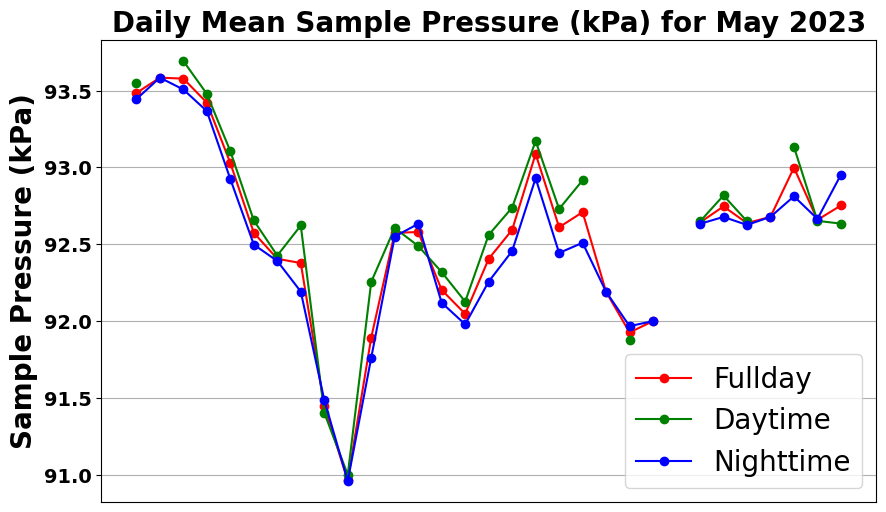

In [8]:
# Plotting the daily mean Sample Pressure for May
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_total.index, daily_mean_total['Sample Pressure (kPa)'], marker='o', linestyle='-', color='r', label='Fullday')
plt.plot(daily_mean_day.index, daily_mean_day['Sample Pressure (kPa)'], marker='o', linestyle='-', color='g', label='Daytime')
plt.plot(daily_mean_night.index, daily_mean_night['Sample Pressure (kPa)'], marker='o', linestyle='-', color='b', label='Nighttime')
plt.title('Daily Mean Sample Pressure (kPa) for May 2023', fontsize=20, fontweight='bold')
plt.ylabel('Sample Pressure (kPa)', fontsize=20, fontweight='bold')
plt.legend(fontsize= 20,loc='lower right')
plt.tick_params(axis='both', labelsize=14)  # Adjust tick label size
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.grid(True)
plt.xticks([])
plt.savefig('F5.jpeg', dpi=300, bbox_inches='tight') 
plt.show()

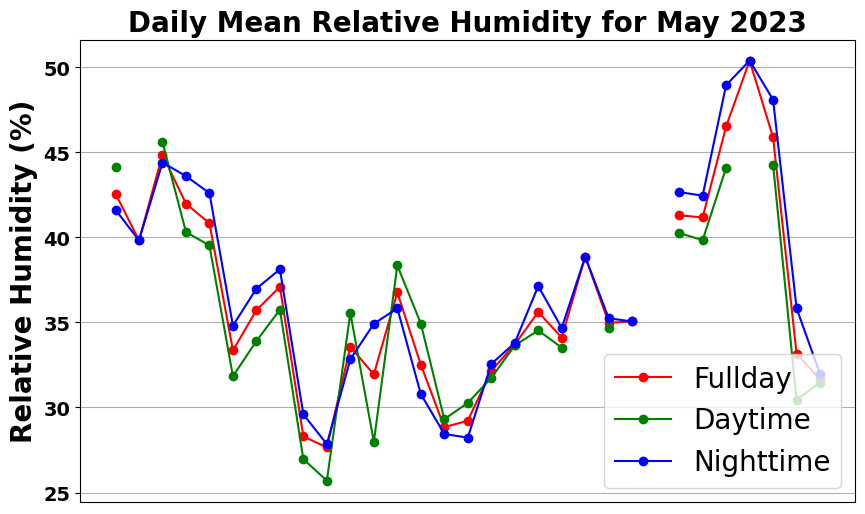

In [9]:
# Plotting the daily mean Sample Pressure for May
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_total.index, daily_mean_total['Relative Humidity (%)'], marker='o', linestyle='-', color='r', label='Fullday')
plt.plot(daily_mean_day.index, daily_mean_day['Relative Humidity (%)'], marker='o', linestyle='-', color='g', label='Daytime')
plt.plot(daily_mean_night.index, daily_mean_night['Relative Humidity (%)'], marker='o', linestyle='-', color='b', label='Nighttime')
plt.title('Daily Mean Relative Humidity for May 2023', fontsize=20, fontweight='bold')
plt.ylabel('Relative Humidity (%)', fontsize=20, fontweight='bold')
plt.legend(fontsize= 20, loc='lower right')
plt.tick_params(axis='both', labelsize=14)  # Adjust tick label size
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.grid(True)
plt.xticks([])
plt.savefig('F6.jpeg', dpi=300, bbox_inches='tight') 
plt.show()

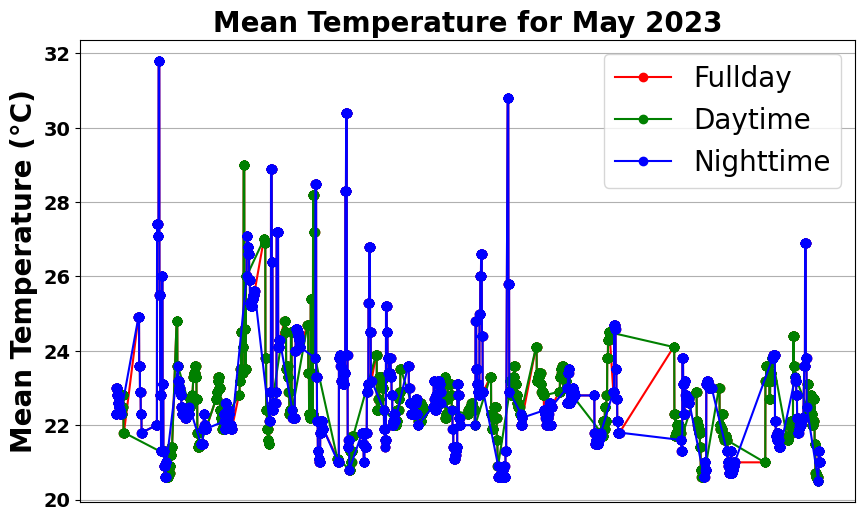

In [10]:
# Plotting the mean temperature for May
plt.figure(figsize=(10, 6))
plt.plot(df_total.index, df_total['Sample Temp (C)'], marker='o', linestyle='-', color='r', label='Fullday')
plt.plot(df_day.index, df_day['Sample Temp (C)'], marker='o', linestyle='-', color='g', label='Daytime')
plt.plot(df_night.index, df_night['Sample Temp (C)'], marker='o', linestyle='-', color='b', label='Nighttime')
plt.title('Mean Temperature for May 2023', fontsize=20, fontweight='bold')
plt.ylabel('Mean Temperature (°C)', fontsize=20, fontweight='bold')
plt.legend(fontsize= 20)
plt.tick_params(axis='both', labelsize=14)  # Adjust tick label size
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.grid(True)
plt.xticks([])
plt.savefig('F1.jpeg', dpi=300, bbox_inches='tight') 
plt.show()

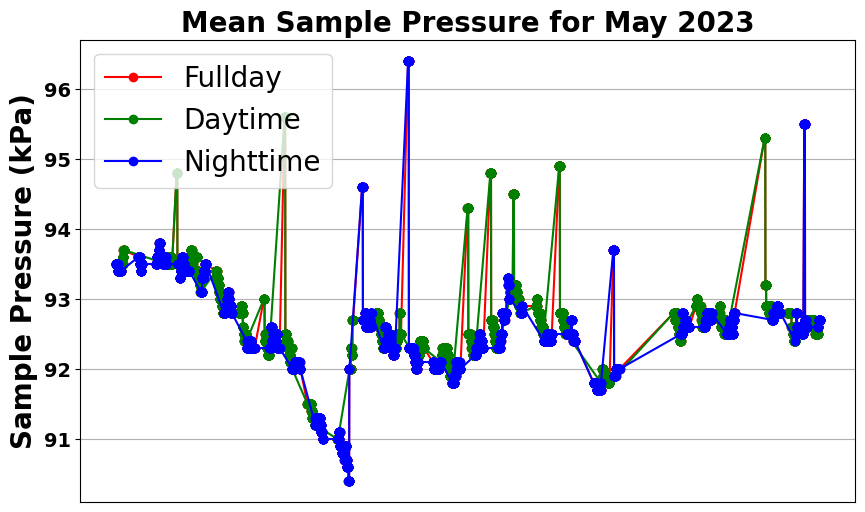

In [11]:
# Plotting the mean temperature for May
plt.figure(figsize=(10, 6))
plt.plot(df_total.index, df_total['Sample Pressure (kPa)'], marker='o', linestyle='-', color='r', label='Fullday')
plt.plot(df_day.index, df_day['Sample Pressure (kPa)'], marker='o', linestyle='-', color='g', label='Daytime')
plt.plot(df_night.index, df_night['Sample Pressure (kPa)'], marker='o', linestyle='-', color='b', label='Nighttime')
plt.title('Mean Sample Pressure for May 2023', fontsize=20, fontweight='bold')
plt.ylabel('Sample Pressure (kPa)', fontsize=20, fontweight='bold')
plt.legend(fontsize= 20)
plt.tick_params(axis='both', labelsize=14)  # Adjust tick label size
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.grid(True)
plt.xticks([])
plt.savefig('F2.jpeg', dpi=300, bbox_inches='tight') 
plt.show()

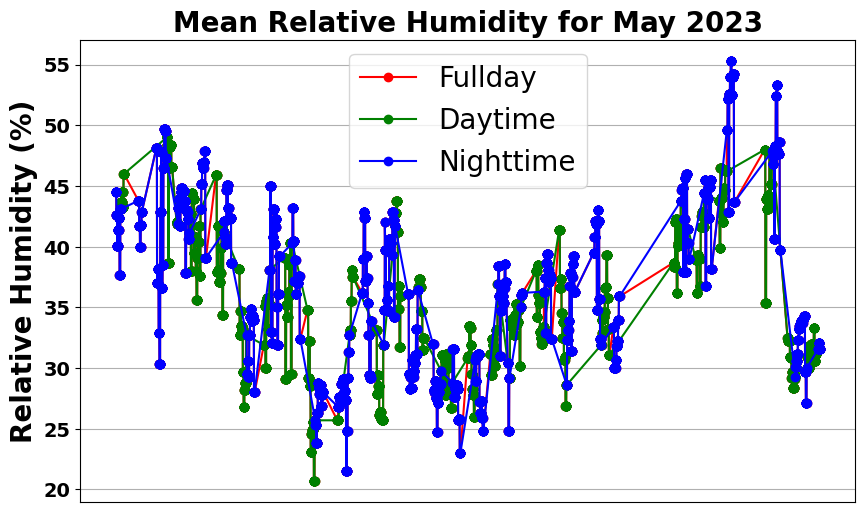

In [12]:
# Plotting the mean temperature for May
plt.figure(figsize=(10, 6))
plt.plot(df_total.index, df_total['Relative Humidity (%)'], marker='o', linestyle='-', color='r', label='Fullday')
plt.plot(df_day.index, df_day['Relative Humidity (%)'], marker='o', linestyle='-', color='g', label='Daytime')
plt.plot(df_night.index, df_night['Relative Humidity (%)'], marker='o', linestyle='-', color='b', label='Nighttime')
plt.title('Mean Relative Humidity for May 2023', fontsize=20, fontweight='bold')
plt.ylabel('Relative Humidity (%)', fontsize=20, fontweight='bold')
plt.legend(fontsize= 20)
plt.tick_params(axis='both', labelsize=14)  # Adjust tick label size
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.grid(True)
plt.xticks([])
plt.savefig('F3.jpeg', dpi=300, bbox_inches='tight') 
plt.show()

In [13]:
# Load your data
# Assuming the data is in a CSV format
data = pd.read_csv("smps_may.csv")

# Specify the base columns that need to be retained
base_columns = ["Date", "Start Time", "Sample Temp (C)", "Sample Pressure (kPa)", "Relative Humidity (%)"]

# Convert numeric column names to float for easier filtering
numeric_columns = [col for col in data.columns if col.replace('.', '', 1).isdigit()]
numeric_columns = [col for col in numeric_columns if float(col) >= 12]  # Ensure numeric values start from 12

# Separate columns based on the specified ranges
nucleation = data[base_columns + [col for col in numeric_columns if 12 <= float(col) <= 25]]
aitken = data[base_columns + [col for col in numeric_columns if 25 < float(col) <= 100]]
accumulation = data[base_columns + [col for col in numeric_columns if 100 < float(col) <= 560]]
data_columns_nucleation = nucleation.iloc[:, 5:]
data_columns_aitken = aitken.iloc[:, 5:]
data_columns_accumulation = accumulation.iloc[:, 5:]

sum_values_nucleation =  data_columns_nucleation.sum(axis=1)
mean_values_nucleation = data_columns_nucleation.mean(axis=1)
std_dev_values_nucleation = data_columns_nucleation.std(axis=1)
percentiles_nucleation = data_columns_nucleation.quantile([0.1, 0.25, 0.5, 0.75, 0.9], axis=1)

sum_values_aitken =  data_columns_aitken.sum(axis=1)
mean_values_aitken = data_columns_aitken.mean(axis=1)
std_dev_values_aitken = data_columns_aitken.std(axis=1)
percentiles_aitken = data_columns_aitken.quantile([0.1, 0.25, 0.5, 0.75, 0.9], axis=1)

sum_values_accumulation =  data_columns_accumulation.sum(axis=1)
mean_values_accumulation = data_columns_accumulation.mean(axis=1)
std_dev_values_accumulation = data_columns_accumulation.std(axis=1)
percentiles_accumulation = data_columns_accumulation.quantile([0.1, 0.25, 0.5, 0.75, 0.9], axis=1)


# Calculate geometric mean and geometric standard deviation
geo_mean_values_nucleation = data_columns_nucleation.apply(lambda x: gmean(x.dropna()), axis=1)
geo_std_dev_values_nucleation = data_columns_nucleation.apply(lambda x: gstd(x.dropna()), axis=1)

geo_mean_values_aitken = data_columns_aitken.apply(lambda x: gmean(x.dropna()), axis=1)
geo_std_dev_values_aitken = data_columns_aitken.apply(lambda x: gstd(x.dropna()), axis=1)

geo_mean_values_accumulation = data_columns_accumulation.apply(lambda x: gmean(x.dropna()), axis=1)
# geo_std_dev_values_accumulation = data_columns_accumulation.apply(lambda x: gstd(x.dropna()), axis=1)

nucleation['Sum'] = sum_values_nucleation
nucleation['Mean'] = mean_values_nucleation
nucleation['SD'] = std_dev_values_nucleation
nucleation['GeoMean'] = geo_mean_values_nucleation
nucleation['GeoStdDev'] = geo_std_dev_values_nucleation

aitken['Sum'] = sum_values_aitken
aitken['Mean'] = mean_values_aitken
aitken['SD'] = std_dev_values_aitken
aitken['GeoMean'] = geo_mean_values_aitken
aitken['GeoStdDev'] = geo_std_dev_values_aitken

accumulation['Sum'] = sum_values_accumulation
accumulation['Mean'] = mean_values_accumulation
accumulation['SD'] = std_dev_values_accumulation
accumulation['GeoMean'] = geo_mean_values_accumulation
# accumulation['GeoStdDev'] = geo_std_dev_values_accumulation


# Add percentile columns
for percentile in [10, 25, 50, 75, 90]:
    nucleation[f'Percentile_{percentile}'] = percentiles_nucleation.loc[percentile / 100].values

for percentile in [10, 25, 50, 75, 90]:
    aitken[f'Percentile_{percentile}'] = percentiles_aitken.loc[percentile / 100].values

for percentile in [10, 25, 50, 75, 90]:
    accumulation[f'Percentile_{percentile}'] = percentiles_accumulation.loc[percentile / 100].values

# Save each subset to a separate CSV file
nucleation.to_csv('nucleation.csv', index=False)
aitken.to_csv('aitken.csv', index=False)
accumulation.to_csv('accumulation.csv', index=False)


In [14]:
data = pd.read_csv("day_data_may.csv")
base_columns = ["Date", "Start Time", "Sample Temp (C)", "Sample Pressure (kPa)", "Relative Humidity (%)"]

# Convert numeric column names to float for easier filtering
numeric_columns = [col for col in data.columns if col.replace('.', '', 1).isdigit()]
numeric_columns = [col for col in numeric_columns if float(col) >= 12]  # Ensure numeric values start from 12

# Separate columns based on the specified ranges
nucleation_day = data[base_columns + [col for col in numeric_columns if 12 <= float(col) <= 25]]
aitken_day = data[base_columns + [col for col in numeric_columns if 25 < float(col) <= 100]]
accumulation_day = data[base_columns + [col for col in numeric_columns if 100 < float(col) <= 560]]

data_columns_nucleation = nucleation_day.iloc[:, 5:]
data_columns_aitken = aitken_day.iloc[:, 5:]
data_columns_accumulation = accumulation_day.iloc[:, 5:]

sum_values_day_nucleation =  data_columns_nucleation.sum(axis=1)
mean_values_day_nucleation = data_columns_nucleation.mean(axis=1)
std_dev_values_day_nucleation = data_columns_nucleation.std(axis=1)
percentiles_nucleation = data_columns_nucleation.quantile([0.1, 0.25, 0.5, 0.75, 0.9], axis=1)

sum_values_day_aitken =  data_columns_aitken.sum(axis=1)
mean_values_day_aitken = data_columns_aitken.mean(axis=1)
std_dev_values_day_aitken = data_columns_aitken.std(axis=1)
percentiles_aitken = data_columns_aitken.quantile([0.1, 0.25, 0.5, 0.75, 0.9], axis=1)

sum_values_day_accumulation =  data_columns_accumulation.sum(axis=1)
mean_values_day_accumulation = data_columns_accumulation.mean(axis=1)
std_dev_values_day_accumulation = data_columns_accumulation.std(axis=1)
percentiles_accumulation = data_columns_accumulation.quantile([0.1, 0.25, 0.5, 0.75, 0.9], axis=1)

# Calculate geometric mean and geometric standard deviation
geo_mean_values_nucleation = data_columns_nucleation.apply(lambda x: gmean(x.dropna()), axis=1)
# geo_std_dev_values_nucleation = data_columns_nucleation.apply(lambda x: gstd(x.dropna()), axis=1)

geo_mean_values_aitken = data_columns_aitken.apply(lambda x: gmean(x.dropna()), axis=1)
# geo_std_dev_values_aitken = data_columns_aitken.apply(lambda x: gstd(x.dropna()), axis=1)

geo_mean_values_accumulation = data_columns_accumulation.apply(lambda x: gmean(x.dropna()), axis=1)
# geo_std_dev_values_accumulation = data_columns_accumulation.apply(lambda x: gstd(x.dropna()), axis=1)

nucleation_day['Sum'] = sum_values_day_nucleation
nucleation_day['Mean'] = mean_values_day_nucleation
nucleation_day['SD'] = std_dev_values_day_nucleation
nucleation_day['GeoMean'] = geo_mean_values_nucleation
# nucleation_day['GeoStdDev'] = geo_std_dev_values_nucleation

aitken_day['Sum'] = sum_values_day_aitken
aitken_day['Mean'] = mean_values_day_aitken
aitken_day['SD'] = std_dev_values_day_aitken
aitken_day['GeoMean'] = geo_mean_values_aitken
# aitken_day['GeoStdDev'] = geo_std_dev_values_aitken

accumulation_day['Sum'] = sum_values_day_accumulation
accumulation_day['Mean'] = mean_values_day_accumulation
accumulation_day['SD'] = std_dev_values_day_accumulation
accumulation_day['GeoMean'] = geo_mean_values_accumulation
# accumulation_day['GeoStdDev'] = geo_std_dev_values_accumulation

# Add percentile columns
for percentile in [10, 25, 50, 75, 90]:
    nucleation_day[f'Percentile_{percentile}'] = percentiles_nucleation.loc[percentile / 100].values

for percentile in [10, 25, 50, 75, 90]:
    aitken_day[f'Percentile_{percentile}'] = percentiles_aitken.loc[percentile / 100].values

for percentile in [10, 25, 50, 75, 90]:
    accumulation_day[f'Percentile_{percentile}'] = percentiles_accumulation.loc[percentile / 100].values

# Save each subset to a separate CSV file
nucleation_day.to_csv('nucleation_day.csv', index=False)
aitken_day.to_csv('aitken_day.csv', index=False)
accumulation_day.to_csv('accumulation_day.csv', index=False)

In [15]:
data = pd.read_csv("night_data_may.csv")
base_columns = ["Date", "Start Time", "Sample Temp (C)", "Sample Pressure (kPa)", "Relative Humidity (%)"]

# Convert numeric column names to float for easier filtering
numeric_columns = [col for col in data.columns if col.replace('.', '', 1).isdigit()]
numeric_columns = [col for col in numeric_columns if float(col) >= 12]  # Ensure numeric values start from 12

# Separate columns based on the specified ranges
nucleation_night = data[base_columns + [col for col in numeric_columns if 12 <= float(col) <= 25]]
aitken_night = data[base_columns + [col for col in numeric_columns if 25 < float(col) <= 100]]
accumulation_night = data[base_columns + [col for col in numeric_columns if 100 < float(col) <= 560]]

data_columns_nucleation = nucleation_night.iloc[:, 5:]
data_columns_aitken = aitken_night.iloc[:, 5:]
data_columns_accumulation = accumulation_night.iloc[:, 5:]

sum_values_night_nucleation =  data_columns_nucleation.sum(axis=1)
mean_values_night_nucleation = data_columns_nucleation.mean(axis=1)
std_dev_values_night_nucleation = data_columns_nucleation.std(axis=1)
percentiles_nucleation = data_columns_nucleation.quantile([0.1, 0.25, 0.5, 0.75, 0.9], axis=1)

sum_values_night_aitken =  data_columns_aitken.sum(axis=1)
mean_values_night_aitken = data_columns_aitken.mean(axis=1)
std_dev_values_night_aitken = data_columns_aitken.std(axis=1)
percentiles_aitken = data_columns_aitken.quantile([0.1, 0.25, 0.5, 0.75, 0.9], axis=1)

sum_values_night_accumulation =  data_columns_accumulation.sum(axis=1)
mean_values_night_accumulation = data_columns_accumulation.mean(axis=1)
std_dev_values_night_accumulation = data_columns_accumulation.std(axis=1)
percentiles_accumulation = data_columns_accumulation.quantile([0.1, 0.25, 0.5, 0.75, 0.9], axis=1)

# Calculate geometric mean and geometric standard deviation
geo_mean_values_nucleation = data_columns_nucleation.apply(lambda x: gmean(x.dropna()), axis=1)
# geo_std_dev_values_nucleation = data_columns_nucleation.apply(lambda x: gstd(x.dropna()), axis=1)

geo_mean_values_aitken = data_columns_aitken.apply(lambda x: gmean(x.dropna()), axis=1)
# geo_std_dev_values_aitken = data_columns_aitken.apply(lambda x: gstd(x.dropna()), axis=1)

geo_mean_values_accumulation = data_columns_accumulation.apply(lambda x: gmean(x.dropna()), axis=1)
# geo_std_dev_values_accumulation = data_columns_accumulation.apply(lambda x: gstd(x.dropna()), axis=1)

nucleation_night['Sum'] = sum_values_night_nucleation
nucleation_night['Mean'] = mean_values_night_nucleation
nucleation_night['SD'] = std_dev_values_night_nucleation
nucleation_night['GeoMean'] = geo_mean_values_nucleation
# nucleation_night['GeoStdDev'] = geo_std_dev_values_nucleation

aitken_night['Sum'] = sum_values_night_aitken
aitken_night['Mean'] = mean_values_night_aitken
aitken_night['SD'] = std_dev_values_night_aitken
aitken_night['GeoMean'] = geo_mean_values_aitken
# aitken_night['GeoStdDev'] = geo_std_dev_values_aitken

accumulation_night['Sum'] = sum_values_night_accumulation
accumulation_night['Mean'] = mean_values_night_accumulation
accumulation_night['SD'] = std_dev_values_night_accumulation
accumulation_night['GeoMean'] = geo_mean_values_accumulation
# accumulation_night['GeoStdDev'] = geo_std_dev_values_accumulation

# Add percentile columns
for percentile in [10, 25, 50, 75, 90]:
    nucleation_night[f'Percentile_{percentile}'] = percentiles_nucleation.loc[percentile / 100].values

for percentile in [10, 25, 50, 75, 90]:
    aitken_night[f'Percentile_{percentile}'] = percentiles_aitken.loc[percentile / 100].values

for percentile in [10, 25, 50, 75, 90]:
    accumulation_night[f'Percentile_{percentile}'] = percentiles_accumulation.loc[percentile / 100].values

# Save each subset to a separate CSV file
nucleation_night.to_csv('nucleation_night.csv', index=False)
aitken_night.to_csv('aitken_night.csv', index=False)
accumulation_night.to_csv('accumulation_night.csv', index=False)

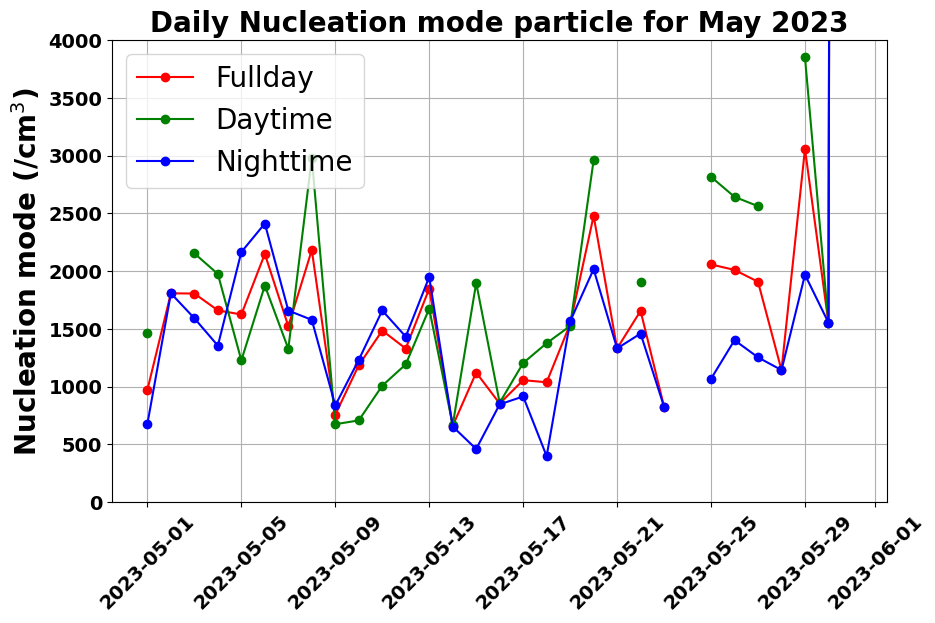

In [16]:
# File paths Nucleation mode
total_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/nucleation.csv'
day_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/nucleation_day.csv'
night_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/nucleation_night.csv'

# Read the data and parse dates
df_total = pd.read_csv(total_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_day = pd.read_csv(day_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_night = pd.read_csv(night_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)

# Rename and set 'DateTime' column as datetime index
df_total.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_total['DateTime'] = pd.to_datetime(df_total['DateTime'])
df_total.set_index('DateTime', inplace=True)

df_day.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_day['DateTime'] = pd.to_datetime(df_day['DateTime'])
df_day.set_index('DateTime', inplace=True)

df_night.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_night['DateTime'] = pd.to_datetime(df_night['DateTime'])
df_night.set_index('DateTime', inplace=True)

# Resample to daily frequency and calculate the daily mean of 'Sample Temp (C)'
daily_mean_total = df_total.resample('D').mean()
daily_mean_day = df_day.resample('D').mean()
daily_mean_night = df_night.resample('D').mean()

# Plotting the daily mean temperature for May
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_total.index, daily_mean_total['Sum'], marker='o', linestyle='-', color='r', label='Fullday')
plt.plot(daily_mean_day.index, daily_mean_day['Sum'], marker='o', linestyle='-', color='g', label='Daytime')
plt.plot(daily_mean_night.index, daily_mean_night['Sum'], marker='o', linestyle='-', color='b', label='Nighttime')
plt.title('Daily Nucleation mode particle for May 2023', fontsize=20, fontweight='bold')
plt.ylabel('Nucleation mode (/cm$^3$)', fontsize=20, fontweight='bold')
plt.legend(fontsize= 20)
plt.tick_params(axis='both', labelsize=14)  # Adjust tick label size
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.ylim([0,4000])    
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig('F7.jpeg', dpi=300, bbox_inches='tight') 
plt.show()

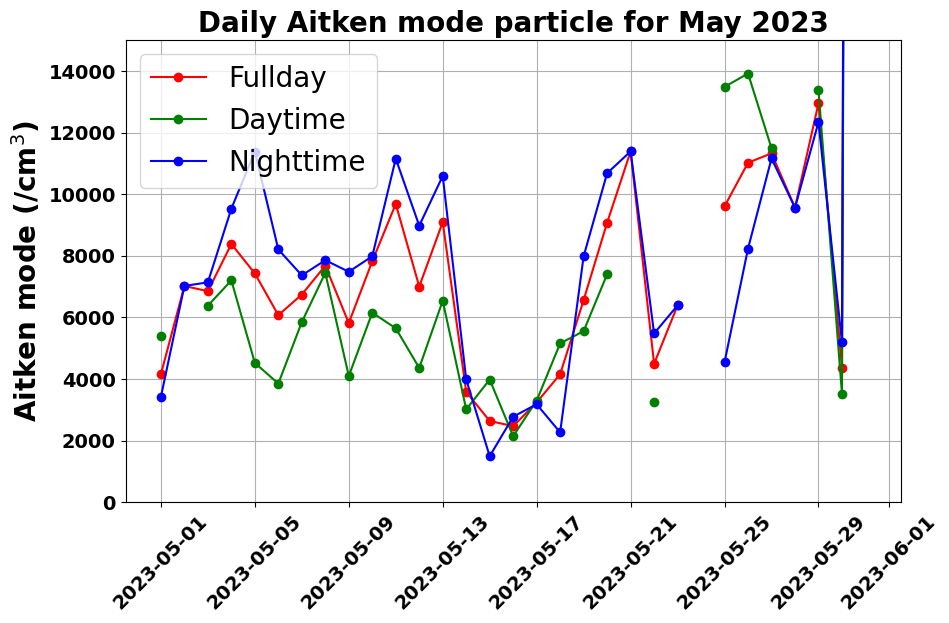

In [17]:
# File paths Nucleation mode
total_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/aitken.csv'
day_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/aitken_day.csv'
night_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/aitken_night.csv'

# Read the data and parse dates
df_total = pd.read_csv(total_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_day = pd.read_csv(day_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_night = pd.read_csv(night_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)

# Rename and set 'DateTime' column as datetime index
df_total.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_total['DateTime'] = pd.to_datetime(df_total['DateTime'])
df_total.set_index('DateTime', inplace=True)

df_day.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_day['DateTime'] = pd.to_datetime(df_day['DateTime'])
df_day.set_index('DateTime', inplace=True)

df_night.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_night['DateTime'] = pd.to_datetime(df_night['DateTime'])
df_night.set_index('DateTime', inplace=True)


# Resample to daily frequency and calculate the daily mean of 'Sample Temp (C)'
daily_mean_total = df_total.resample('D').mean()
daily_mean_day = df_day.resample('D').mean()
daily_mean_night = df_night.resample('D').mean()

# Plotting the daily mean temperature for May
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_total.index, daily_mean_total['Sum'], marker='o', linestyle='-', color='r', label='Fullday')
plt.plot(daily_mean_day.index, daily_mean_day['Sum'], marker='o', linestyle='-', color='g', label='Daytime')
plt.plot(daily_mean_night.index, daily_mean_night['Sum'], marker='o', linestyle='-', color='b', label='Nighttime')
plt.title('Daily Aitken mode particle for May 2023', fontsize=20, fontweight='bold')
plt.ylabel('Aitken mode (/cm$^3$)', fontsize=20, fontweight='bold')
plt.legend(fontsize= 20)
plt.tick_params(axis='both', labelsize=14)  # Adjust tick label size
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.ylim([0,15000])    
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig('F8.jpeg', dpi=300, bbox_inches='tight') 
plt.show()

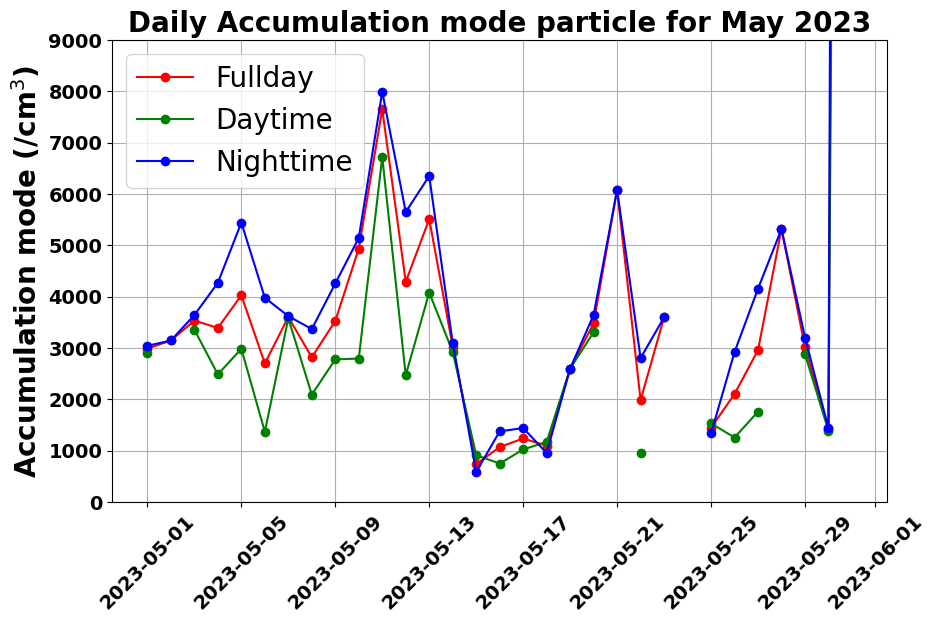

In [18]:
# File paths Nucleation mode
total_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/accumulation.csv'
day_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/accumulation_day.csv'
night_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/accumulation_night.csv'

# Read the data and parse dates
df_total = pd.read_csv(total_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_day = pd.read_csv(day_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_night = pd.read_csv(night_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)

# Rename and set 'DateTime' column as datetime index
df_total.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_total['DateTime'] = pd.to_datetime(df_total['DateTime'])
df_total.set_index('DateTime', inplace=True)

df_day.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_day['DateTime'] = pd.to_datetime(df_day['DateTime'])
df_day.set_index('DateTime', inplace=True)

df_night.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_night['DateTime'] = pd.to_datetime(df_night['DateTime'])
df_night.set_index('DateTime', inplace=True)


# Resample to daily frequency and calculate the daily mean of 'Sample Temp (C)'
daily_mean_total = df_total.resample('D').mean()
daily_mean_day = df_day.resample('D').mean()
daily_mean_night = df_night.resample('D').mean()

# Plotting the daily mean temperature for May
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_total.index, daily_mean_total['Sum'], marker='o', linestyle='-', color='r', label='Fullday')
plt.plot(daily_mean_day.index, daily_mean_day['Sum'], marker='o', linestyle='-', color='g', label='Daytime')
plt.plot(daily_mean_night.index, daily_mean_night['Sum'], marker='o', linestyle='-', color='b', label='Nighttime')
plt.title('Daily Accumulation mode particle for May 2023', fontsize=20, fontweight='bold')
plt.ylabel('Accumulation mode (/cm$^3$)', fontsize=20, fontweight='bold')
plt.legend(fontsize= 20)
plt.tick_params(axis='both', labelsize=14)  # Adjust tick label size
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.ylim([0,9000])    
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig('F9.jpeg', dpi=300, bbox_inches='tight') 
plt.show()

In [19]:
# # Load your dataset
# total_df = pd.read_csv('smps_may.csv')
# day_df = pd.read_csv('day_data_may.csv')
# night_df = pd.read_csv('night_data_may.csv')

# # Convert 'Date' and 'Start Time' to datetime with dayfirst=True
# total_df['DateTime'] = pd.to_datetime(total_df['Date'] + ' ' + total_df['Start Time'], dayfirst=True, errors='coerce')
# day_df['DateTime'] = pd.to_datetime(day_df['Date'] + ' ' + day_df['Start Time'], dayfirst=True, errors='coerce')
# night_df['DateTime'] = pd.to_datetime(night_df['Date'] + ' ' + night_df['Start Time'], dayfirst=True, errors='coerce')

# # Drop rows where conversion failed (NaT values)
# total_df = total_df.dropna(subset=['DateTime'])
# day_df = day_df.dropna(subset=['DateTime'])
# night_df = night_df.dropna(subset=['DateTime'])

# # Set 'DateTime' as index
# total_df.set_index('DateTime', inplace=True)
# day_df.set_index('DateTime', inplace=True)
# night_df.set_index('DateTime', inplace=True)


# # Resample data to hourly frequency and retrieve random time entries for each hour
# def random_hourly_sample(total_df):
#     total_df['Hour'] = total_df.index.hour
#     random_samples = []
#     for hour in range(24):  # Iterate over each hour of the day
#         hourly_data_total = total_df[total_df['Hour'] == hour]
#         if not hourly_data_total.empty:
#             random_sample = hourly_data_total.sample(1)  # Retrieve random sample for this hour
#             random_samples.append(random_sample)
#     return pd.concat(random_samples)

# def random_hourly_sample(day_df):
#     day_df['Hour'] = day_df.index.hour
#     random_samples = []
#     for hour in range(24):  # Iterate over each hour of the day
#         hourly_data_day = day_df[day_df['Hour'] == hour]
#         if not hourly_data_day.empty:
#             random_sample = hourly_data_day.sample(1)  # Retrieve random sample for this hour
#             random_samples.append(random_sample)
#     return pd.concat(random_samples)

# def random_hourly_sample(night_df):
#     night_df['Hour'] = night_df.index.hour
#     random_samples = []
#     for hour in range(24):  # Iterate over each hour of the day
#         hourly_data_night = night_df[night_df['Hour'] == hour]
#         if not hourly_data_night.empty:
#             random_sample = hourly_data_night.sample(1)  # Retrieve random sample for this hour
#             random_samples.append(random_sample)
#     return pd.concat(random_samples)


# # Apply the function for each day in May 2023
# total_df_may = total_df[total_df.index.month == 5]
# random_samples_total = total_df_may.groupby(total_df_may.index.date).apply(random_hourly_sample)

# day_df_may = day_df[day_df.index.month == 5]
# random_samples_day = day_df_may.groupby(day_df_may.index.date).apply(random_hourly_sample)

# night_df_may = night_df[night_df.index.month == 5]
# random_samples_night = night_df_may.groupby(night_df_may.index.date).apply(random_hourly_sample)

# # Calculate mean temperature for each hour across all days
# hourly_means_total = random_samples_total.groupby(random_samples_total['Hour'])['Relative Humidity (%)'].mean()
# hourly_means_day = random_samples_day.groupby(random_samples_day['Hour'])['Relative Humidity (%)'].mean()
# hourly_means_night = random_samples_night.groupby(random_samples_night['Hour'])['Relative Humidity (%)'].mean()

# # Plotting the time series
# plt.figure(figsize=(10, 6))
# plt.plot(hourly_means_total.index, hourly_means_total.values, marker='o', linestyle='-', color='r', label='Total')
# plt.plot(hourly_means_day.index, hourly_means_day.values, marker='o', linestyle='-',color='g', label='Day')
# plt.plot(hourly_means_night.index, hourly_means_night.values, marker='o', linestyle='-',color='b', label='Night')
# plt.xticks(range(24))  # Set x-axis ticks for each hour of the day
# plt.xlabel('Hour of the day')
# plt.title('Hourly Average Sample Temperature for May 2023', fontsize=20, fontweight='bold')
# plt.ylabel('Mean Temperature (°C)', fontsize=20, fontweight='bold')
# plt.legend(fontsize= 20)
# plt.tick_params(axis='both', labelsize=14)  # Adjust tick label size
# for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
#     label.set_fontweight('bold')
# plt.grid(True)
# plt.show()
# # plt.savefig('mean_temp.jpeg', dpi=300, bbox_inches='tight') 

In [20]:
# total_df = pd.read_csv('smps_may.csv')
# total_df['DateTime'] = pd.to_datetime(total_df['Date'] + ' ' + total_df['Start Time'], dayfirst=True, errors='coerce')
# total_df.dropna(subset=['DateTime'], inplace=True)
# total_df.set_index('DateTime', inplace=True)

# day_df = pd.read_csv('day_data_may.csv')
# day_df['DateTime'] = pd.to_datetime(day_df['Date'] + ' ' + day_df['Start Time'], dayfirst=True, errors='coerce')
# day_df.dropna(subset=['DateTime'], inplace=True)
# day_df.set_index('DateTime', inplace=True)

# night_df = pd.read_csv('night_data_may.csv')
# night_df['DateTime'] = pd.to_datetime(night_df['Date'] + ' ' + night_df['Start Time'], dayfirst=True, errors='coerce')
# night_df.dropna(subset=['DateTime'], inplace=True)
# night_df.set_index('DateTime', inplace=True)

# # Add an hour column for grouping
# total_df['Hour'] = total_df.index.hour
# day_df['Hour'] = day_df.index.hour
# night_df['Hour'] = night_df.index.hour

# # Function to sample one random entry per hour per day
# def random_hourly_sample_total(total_df):
#     hourly_samples_total = []
#     for hour in range(24):  # Loop through all hours
#         hourly_data_total = total_df[total_df['Hour'] == hour]
#         if not hourly_data_total.empty:
#             sample_total = hourly_data_total.sample(1)
#             hourly_samples_total.append(sample_total)
#     return pd.concat(hourly_samples_total) if hourly_samples_total else pd.DataFrame()

# def random_hourly_sample_day(day_df):
#     hourly_samples_day = []
#     for hour in range(24):  # Loop through all hours
#         hourly_data_day = day_df[day_df['Hour'] == hour]
#         if not hourly_data_day.empty:
#             sample_day = hourly_data_day.sample(1)
#             hourly_samples_day.append(sample_day)
#     return pd.concat(hourly_samples_day) if hourly_samples_day else pd.DataFrame()

# # Apply the random sampling function and calculate hourly mean temperature
# random_samples_total = total_df.groupby(total_df.index.date).apply(random_hourly_sample_total)
# random_samples_total.reset_index(level=0, drop=True, inplace=True)
# hourly_samples_total = random_samples_total.groupby('Hour')['Sample Temp (C)'].mean()

# random_samples_day = day_df.groupby(day_df.index.date).apply(random_hourly_sample_day)
# random_samples_day.reset_index(level=0, drop=True, inplace=True)
# hourly_samples_day = random_samples_day.groupby('Hour')['Sample Temp (C)'].mean()

# # Reindex to ensure all 24 hours are present
# hourly_means_total = hourly_means_total.reindex(range(24), fill_value=np.nan)
# hourly_means_day = hourly_means_day.reindex(range(24), fill_value=np.nan)

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(hourly_means_total.index, hourly_means_total.values, marker='o', linestyle='-', color='r', label='Day')
# plt.plot(hourly_means_day.index, hourly_means_day.values, marker='o', linestyle='-', color='g', label='Day')
# plt.xticks(range(24), fontsize=14, fontweight='bold')
# plt.xlabel('Hour of the day', fontsize=16, fontweight='bold')
# plt.title('Hourly Average Sample Temperature for May 2023', fontsize=20, fontweight='bold')
# plt.ylabel('Mean Temperature (°C)', fontsize=16, fontweight='bold')
# plt.legend(fontsize=16)
# plt.grid(True)
# plt.show()


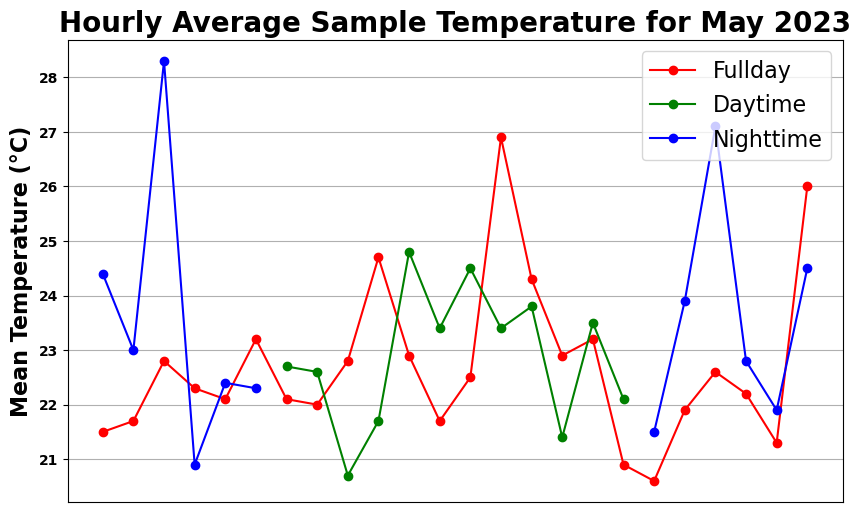

In [21]:
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Start Time'], dayfirst=True, errors='coerce')
    df.dropna(subset=['DateTime'], inplace=True)
    df.set_index('DateTime', inplace=True)
    df['Hour'] = df.index.hour
    return df

def calculate_hourly_means(df):
    # Sample one random entry per hour across all days
    hourly_samples = []
    for hour in range(24):
        hourly_data = df[df['Hour'] == hour]
        if not hourly_data.empty:
            sample = hourly_data.sample(1)
            hourly_samples.append(sample)
    # Combine samples and calculate mean for each hour
    sampled_data = pd.concat(hourly_samples)
    hourly_means = sampled_data.groupby('Hour')['Sample Temp (C)'].mean()
    return hourly_means.reindex(range(24), fill_value=np.nan)

# Load, process, and calculate hourly means for day and night data
day_df = load_and_prepare_data('day_data_may.csv')
night_df = load_and_prepare_data('night_data_may.csv')
total_df = load_and_prepare_data('smps_may.csv')

hourly_means_day = calculate_hourly_means(day_df)
hourly_means_night = calculate_hourly_means(night_df)
hourly_means_total = calculate_hourly_means(total_df)

# Plotting both day and night data on a single plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_means_total.index, hourly_means_total.values, marker='o', linestyle='-', color='r', label='Fullday')
plt.plot(hourly_means_day.index, hourly_means_day.values, marker='o', linestyle='-', color='g', label='Daytime')
plt.plot(hourly_means_night.index, hourly_means_night.values, marker='o', linestyle='-', color='b', label='Nighttime')

plt.xticks([])
plt.ylabel('Mean Temperature (°C)', fontsize=16, fontweight='bold')
plt.title('Hourly Average Sample Temperature for May 2023', fontsize=20, fontweight='bold')
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.legend(fontsize=16)
plt.grid('true')
plt.savefig('F10.jpeg', dpi=300, bbox_inches='tight') 
plt.show()

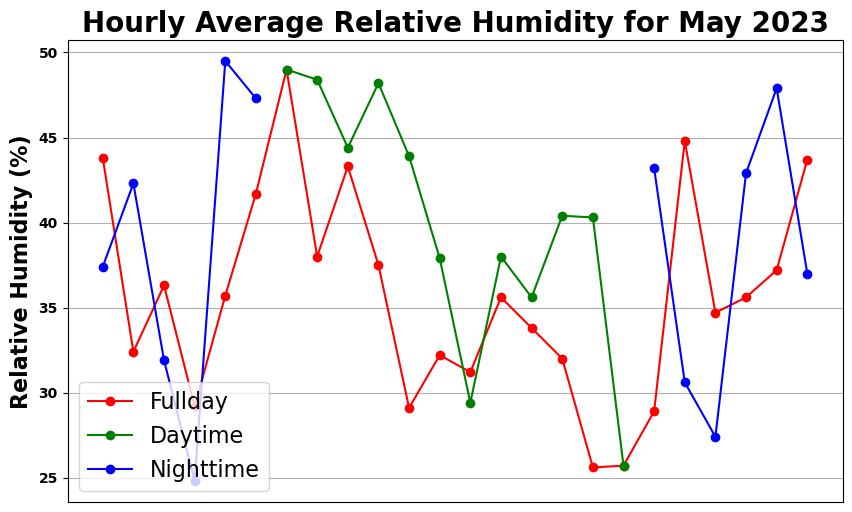

In [22]:
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Start Time'], dayfirst=True, errors='coerce')
    df.dropna(subset=['DateTime'], inplace=True)
    df.set_index('DateTime', inplace=True)
    df['Hour'] = df.index.hour
    return df

def calculate_hourly_means(df):
    # Sample one random entry per hour across all days
    hourly_samples = []
    for hour in range(24):
        hourly_data = df[df['Hour'] == hour]
        if not hourly_data.empty:
            sample = hourly_data.sample(1)
            hourly_samples.append(sample)
    # Combine samples and calculate mean for each hour
    sampled_data = pd.concat(hourly_samples)
    hourly_means = sampled_data.groupby('Hour')['Relative Humidity (%)'].mean()
    return hourly_means.reindex(range(24), fill_value=np.nan)

# Load, process, and calculate hourly means for day and night data
day_df = load_and_prepare_data('day_data_may.csv')
night_df = load_and_prepare_data('night_data_may.csv')
total_df = load_and_prepare_data('smps_may.csv')

hourly_means_day = calculate_hourly_means(day_df)
hourly_means_night = calculate_hourly_means(night_df)
hourly_means_total = calculate_hourly_means(total_df)

# Plotting both day and night data on a single plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_means_total.index, hourly_means_total.values, marker='o', linestyle='-', color='r', label='Fullday')
plt.plot(hourly_means_day.index, hourly_means_day.values, marker='o', linestyle='-', color='g', label='Daytime')
plt.plot(hourly_means_night.index, hourly_means_night.values, marker='o', linestyle='-', color='b', label='Nighttime')

plt.xticks([])
plt.ylabel('Relative Humidity (%)', fontsize=16, fontweight='bold')
plt.title('Hourly Average Relative Humidity for May 2023', fontsize=20, fontweight='bold')
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.legend(fontsize=16)
plt.grid(True)
plt.savefig('F11.jpeg', dpi=600, bbox_inches='tight') 
plt.show()


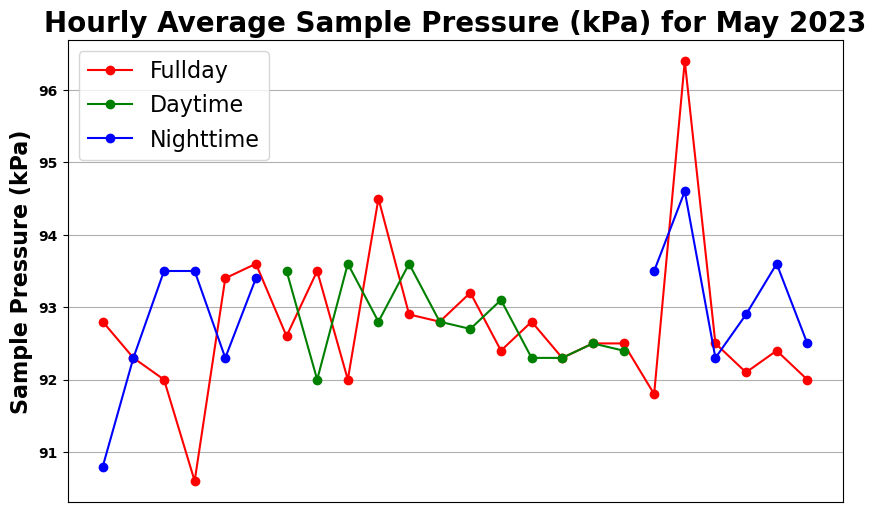

In [23]:
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Start Time'], dayfirst=True, errors='coerce')
    df.dropna(subset=['DateTime'], inplace=True)
    df.set_index('DateTime', inplace=True)
    df['Hour'] = df.index.hour
    return df

def calculate_hourly_means(df):
    # Sample one random entry per hour across all days
    hourly_samples = []
    for hour in range(24):
        hourly_data = df[df['Hour'] == hour]
        if not hourly_data.empty:
            sample = hourly_data.sample(1)
            hourly_samples.append(sample)
    # Combine samples and calculate mean for each hour
    sampled_data = pd.concat(hourly_samples)
    hourly_means = sampled_data.groupby('Hour')['Sample Pressure (kPa)'].mean()
    return hourly_means.reindex(range(24), fill_value=np.nan)

# Load, process, and calculate hourly means for day and night data
day_df = load_and_prepare_data('day_data_may.csv')
night_df = load_and_prepare_data('night_data_may.csv')
total_df = load_and_prepare_data('smps_may.csv')

hourly_means_day = calculate_hourly_means(day_df)
hourly_means_night = calculate_hourly_means(night_df)
hourly_means_total = calculate_hourly_means(total_df)

# Plotting both day and night data on a single plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_means_total.index, hourly_means_total.values, marker='o', linestyle='-', color='r', label='Fullday')
plt.plot(hourly_means_day.index, hourly_means_day.values, marker='o', linestyle='-', color='g', label='Daytime')
plt.plot(hourly_means_night.index, hourly_means_night.values, marker='o', linestyle='-', color='b', label='Nighttime')

plt.xticks([])
plt.ylabel('Sample Pressure (kPa)', fontsize=16, fontweight='bold')
plt.title('Hourly Average Sample Pressure (kPa) for May 2023', fontsize=20, fontweight='bold')
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.legend(fontsize=16)
plt.grid(True)
plt.savefig('F12.jpeg', dpi=600, bbox_inches='tight') 
plt.show()


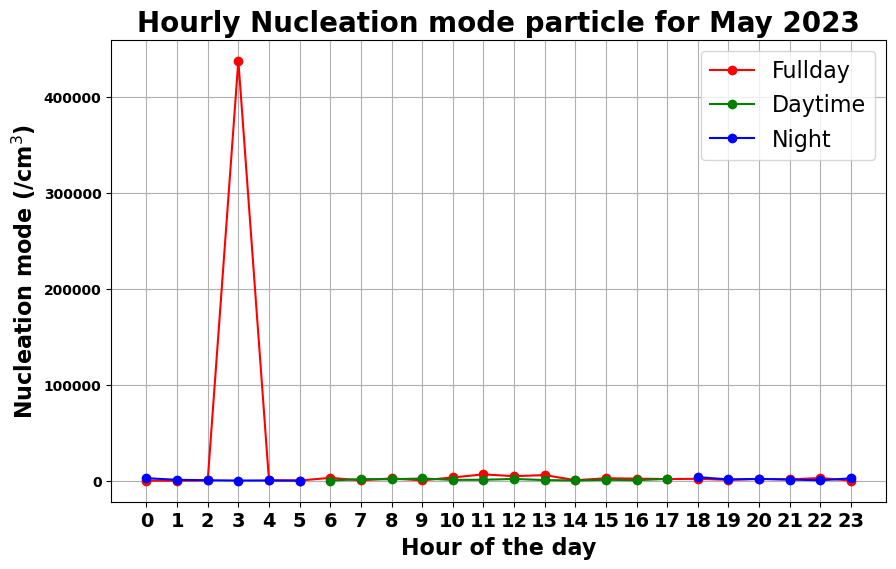

In [24]:
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Start Time'], dayfirst=True, errors='coerce')
    df.dropna(subset=['DateTime'], inplace=True)
    df.set_index('DateTime', inplace=True)
    df['Hour'] = df.index.hour
    return df

def calculate_hourly_means(df):
    # Sample one random entry per hour across all days
    hourly_samples = []
    for hour in range(24):
        hourly_data = df[df['Hour'] == hour]
        if not hourly_data.empty:
            sample = hourly_data.sample(1)
            hourly_samples.append(sample)
    # Combine samples and calculate mean for each hour
    sampled_data = pd.concat(hourly_samples)
    hourly_means = sampled_data.groupby('Hour')['Sum'].mean()
    return hourly_means.reindex(range(24), fill_value=np.nan)

# Load, process, and calculate hourly means for day and night data
day_df = load_and_prepare_data('nucleation_day.csv')
night_df = load_and_prepare_data('nucleation_night.csv')
total_df = load_and_prepare_data('nucleation.csv')

hourly_means_day = calculate_hourly_means(day_df)
hourly_means_night = calculate_hourly_means(night_df)
hourly_means_total = calculate_hourly_means(total_df)

plt.figure(figsize=(10, 6))
plt.plot(hourly_means_total.index, hourly_means_total.values, marker='o', linestyle='-', color='r', label='Fullday')
plt.plot(hourly_means_day.index, hourly_means_day.values, marker='o', linestyle='-', color='g', label='Daytime')
plt.plot(hourly_means_night.index, hourly_means_night.values, marker='o', linestyle='-', color='b', label='Night')

plt.xticks(range(24), fontsize=14, fontweight='bold')
plt.xlabel('Hour of the day', fontsize=16, fontweight='bold')
plt.ylabel('Nucleation mode (/cm$^3$)', fontsize=16, fontweight='bold')
plt.title('Hourly Nucleation mode particle for May 2023', fontsize=20, fontweight='bold')
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.legend(fontsize=16)
plt.grid(True)
plt.savefig('F13.jpeg', dpi=600, bbox_inches='tight') 
plt.show()

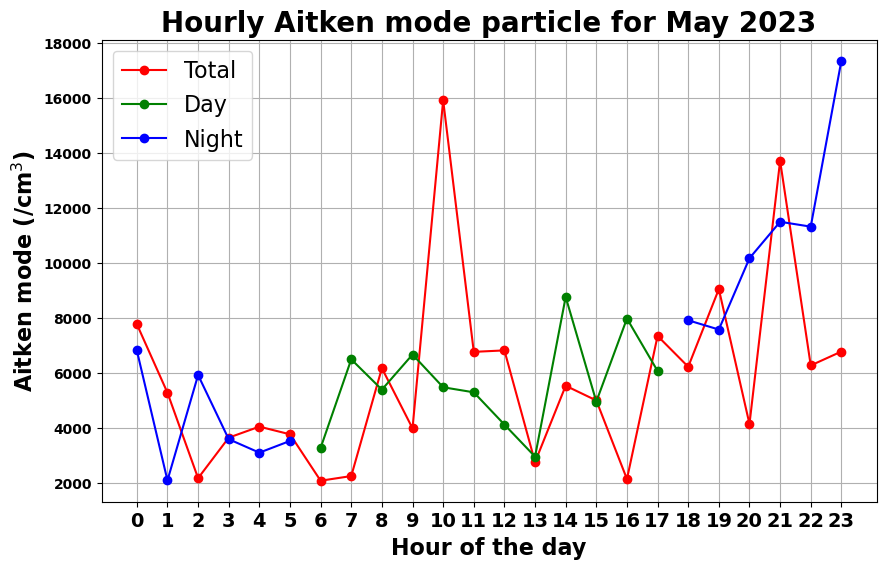

In [25]:
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Start Time'], dayfirst=True, errors='coerce')
    df.dropna(subset=['DateTime'], inplace=True)
    df.set_index('DateTime', inplace=True)
    df['Hour'] = df.index.hour
    return df

def calculate_hourly_means(df):
    # Sample one random entry per hour across all days
    hourly_samples = []
    for hour in range(24):
        hourly_data = df[df['Hour'] == hour]
        if not hourly_data.empty:
            sample = hourly_data.sample(1)
            hourly_samples.append(sample)
    # Combine samples and calculate mean for each hour
    sampled_data = pd.concat(hourly_samples)
    hourly_means = sampled_data.groupby('Hour')['Sum'].mean()
    return hourly_means.reindex(range(24), fill_value=np.nan)

# Load, process, and calculate hourly means for day and night data
day_df = load_and_prepare_data('aitken_day.csv')
night_df = load_and_prepare_data('aitken_night.csv')
total_df = load_and_prepare_data('aitken.csv')

hourly_means_day = calculate_hourly_means(day_df)
hourly_means_night = calculate_hourly_means(night_df)
hourly_means_total = calculate_hourly_means(total_df)

# Plotting both day and night data on a single plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_means_total.index, hourly_means_total.values, marker='o', linestyle='-', color='r', label='Total')
plt.plot(hourly_means_day.index, hourly_means_day.values, marker='o', linestyle='-', color='g', label='Day')
plt.plot(hourly_means_night.index, hourly_means_night.values, marker='o', linestyle='-', color='b', label='Night')

plt.xticks(range(24), fontsize=14, fontweight='bold')
plt.xlabel('Hour of the day', fontsize=16, fontweight='bold')
plt.ylabel('Aitken mode (/cm$^3$)', fontsize=16, fontweight='bold')
plt.title('Hourly Aitken mode particle for May 2023', fontsize=20, fontweight='bold')
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.legend(fontsize=16)
plt.grid(True)
plt.savefig('F14.jpeg', dpi=600, bbox_inches='tight') 
plt.show()

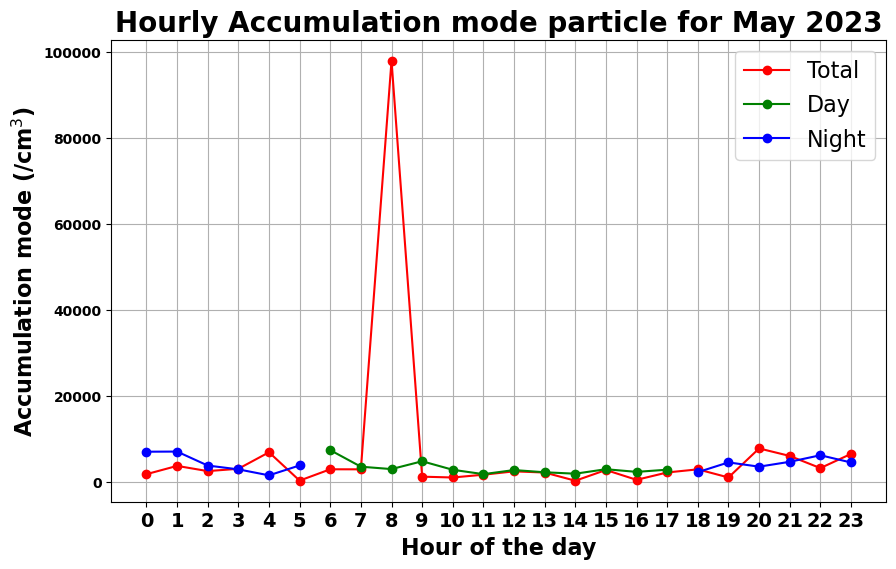

In [42]:
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Start Time'], dayfirst=True, errors='coerce')
    df.dropna(subset=['DateTime'], inplace=True)
    df.set_index('DateTime', inplace=True)
    df['Hour'] = df.index.hour
    return df

def calculate_hourly_means(df):
    # Sample one random entry per hour across all days
    hourly_samples = []
    for hour in range(24):
        hourly_data = df[df['Hour'] == hour]
        if not hourly_data.empty:
            sample = hourly_data.sample(1)
            hourly_samples.append(sample)
    # Combine samples and calculate mean for each hour
    sampled_data = pd.concat(hourly_samples)
    hourly_means = sampled_data.groupby('Hour')['Sum'].mean()
    return hourly_means.reindex(range(24), fill_value=np.nan)

# Load, process, and calculate hourly means for day and night data
day_df = load_and_prepare_data('accumulation_day.csv')
night_df = load_and_prepare_data('accumulation_night.csv')
total_df = load_and_prepare_data('accumulation.csv')

hourly_means_day = calculate_hourly_means(day_df)
hourly_means_night = calculate_hourly_means(night_df)
hourly_means_total = calculate_hourly_means(total_df)

# Plotting both day and night data on a single plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_means_total.index, hourly_means_total.values, marker='o', linestyle='-', color='r', label='Total')
plt.plot(hourly_means_day.index, hourly_means_day.values, marker='o', linestyle='-', color='g', label='Day')
plt.plot(hourly_means_night.index, hourly_means_night.values, marker='o', linestyle='-', color='b', label='Night')

plt.xticks(range(24), fontsize=14, fontweight='bold')
plt.xlabel('Hour of the day', fontsize=16, fontweight='bold')
plt.ylabel('Accumulation mode (/cm$^3$)', fontsize=16, fontweight='bold')
plt.title('Hourly Accumulation mode particle for May 2023', fontsize=20, fontweight='bold')
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.legend(fontsize=16)
plt.grid(True)
plt.savefig('F15.jpeg', dpi=600, bbox_inches='tight') 
plt.show()

In [27]:
# # Load your data
# # Assuming the data is in a CSV format
# data = pd.read_csv("smps_may.csv")

# # Specify the base columns that need to be retained
# base_columns = ["Date", "Start Time", "Sample Temp (C)", "Sample Pressure (kPa)", "Relative Humidity (%)"]

# # Convert numeric column names to float for easier filtering
# numeric_columns = [col for col in data.columns if col.replace('.', '', 1).isdigit()]
# numeric_columns = [col for col in numeric_columns if float(col) >= 12]  # Ensure numeric values start from 12

# # Separate columns based on the specified ranges
# nucleation = data[base_columns + [col for col in numeric_columns if 12 <= float(col) <= 25]]
# aitken = data[base_columns + [col for col in numeric_columns if 25 < float(col) <= 100]]
# accumulation = data[base_columns + [col for col in numeric_columns if 100 < float(col) <= 560]]
# data_columns_nucleation = nucleation.iloc[:, 5:]
# data_columns_aitken = aitken.iloc[:, 5:]
# data_columns_accumulation = accumulation.iloc[:, 5:]

# sum_values_nucleation =  data_columns_nucleation.sum(axis=1)
# mean_values_nucleation = data_columns_nucleation.mean(axis=1)
# std_dev_values_nucleation = data_columns_nucleation.std(axis=1)
# percentiles_nucleation = data_columns_nucleation.quantile([0.1, 0.25, 0.5, 0.75, 0.9], axis=1)

# sum_values_aitken =  data_columns_aitken.sum(axis=1)
# mean_values_aitken = data_columns_aitken.mean(axis=1)
# std_dev_values_aitken = data_columns_aitken.std(axis=1)
# percentiles_aitken = data_columns_aitken.quantile([0.1, 0.25, 0.5, 0.75, 0.9], axis=1)

# sum_values_accumulation =  data_columns_accumulation.sum(axis=1)
# mean_values_accumulation = data_columns_accumulation.mean(axis=1)
# std_dev_values_accumulation = data_columns_accumulation.std(axis=1)
# percentiles_accumulation = data_columns_accumulation.quantile([0.1, 0.25, 0.5, 0.75, 0.9], axis=1)


# # Calculate geometric mean and geometric standard deviation
# geo_mean_values_nucleation = data_columns_nucleation.apply(lambda x: gmean(x.dropna()), axis=1)
# geo_std_dev_values_nucleation = data_columns_nucleation.apply(lambda x: gstd(x.dropna()), axis=1)

# geo_mean_values_aitken = data_columns_aitken.apply(lambda x: gmean(x.dropna()), axis=1)
# geo_std_dev_values_aitken = data_columns_aitken.apply(lambda x: gstd(x.dropna()), axis=1)

# geo_mean_values_accumulation = data_columns_accumulation.apply(lambda x: gmean(x.dropna()), axis=1)
# # geo_std_dev_values_accumulation = data_columns_accumulation.apply(lambda x: gstd(x.dropna()), axis=1)



# nucleation['Sum'] = sum_values_nucleation
# nucleation['Mean'] = mean_values_nucleation
# nucleation['SD'] = std_dev_values_nucleation
# nucleation['GeoMean'] = geo_mean_values_nucleation
# nucleation['GeoStdDev'] = geo_std_dev_values_nucleation

# aitken['Sum'] = sum_values_aitken
# aitken['Mean'] = mean_values_aitken
# aitken['SD'] = std_dev_values_aitken
# aitken['GeoMean'] = geo_mean_values_aitken
# aitken['GeoStdDev'] = geo_std_dev_values_aitken

# accumulation['Sum'] = sum_values_accumulation
# accumulation['Mean'] = mean_values_accumulation
# accumulation['SD'] = std_dev_values_accumulation
# accumulation['GeoMean'] = geo_mean_values_accumulation
# # accumulation['GeoStdDev'] = geo_std_dev_values_accumulation


# # Add percentile columns
# for percentile in [10, 25, 50, 75, 90]:
#     nucleation[f'Percentile_{percentile}'] = percentiles_nucleation.loc[percentile / 100].values

# for percentile in [10, 25, 50, 75, 90]:
#     aitken[f'Percentile_{percentile}'] = percentiles_aitken.loc[percentile / 100].values

# for percentile in [10, 25, 50, 75, 90]:
#     accumulation[f'Percentile_{percentile}'] = percentiles_accumulation.loc[percentile / 100].values




# # Save each subset to a separate CSV file
# nucleation.to_csv('nucleation.csv', index=False)
# aitken.to_csv('aitken.csv', index=False)
# accumulation.to_csv('accumulation.csv', index=False)


In [28]:
# File paths
nucleation_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/nucleation.csv'
aitken_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/aitken.csv'
accumulation_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/accumulation.csv'

# Read the data and parse dates
df_nucleation = pd.read_csv(nucleation_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_aitken = pd.read_csv(aitken_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_accumulation = pd.read_csv(accumulation_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)

# Rename and set 'DateTime' column as datetime index
df_nucleation.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_nucleation['DateTime'] = pd.to_datetime(df_nucleation['DateTime'])
df_nucleation.set_index('DateTime', inplace=True)

df_aitken.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_aitken['DateTime'] = pd.to_datetime(df_aitken['DateTime'])
df_aitken.set_index('DateTime', inplace=True)

df_accumulation.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_accumulation['DateTime'] = pd.to_datetime(df_accumulation['DateTime'])
df_accumulation.set_index('DateTime', inplace=True)


# Resample to daily frequency and calculate the daily mean of 'Sample Temp (C)'
daily_mean_nucleation = df_nucleation.resample('D').mean()
daily_mean_aitken = df_aitken.resample('D').mean()
daily_mean_accumulation = df_accumulation.resample('D').mean()

nucleation_sum = daily_mean_nucleation['Sum']
aitken_sum = daily_mean_aitken['Sum']
accumulation_sum = daily_mean_accumulation['Sum']

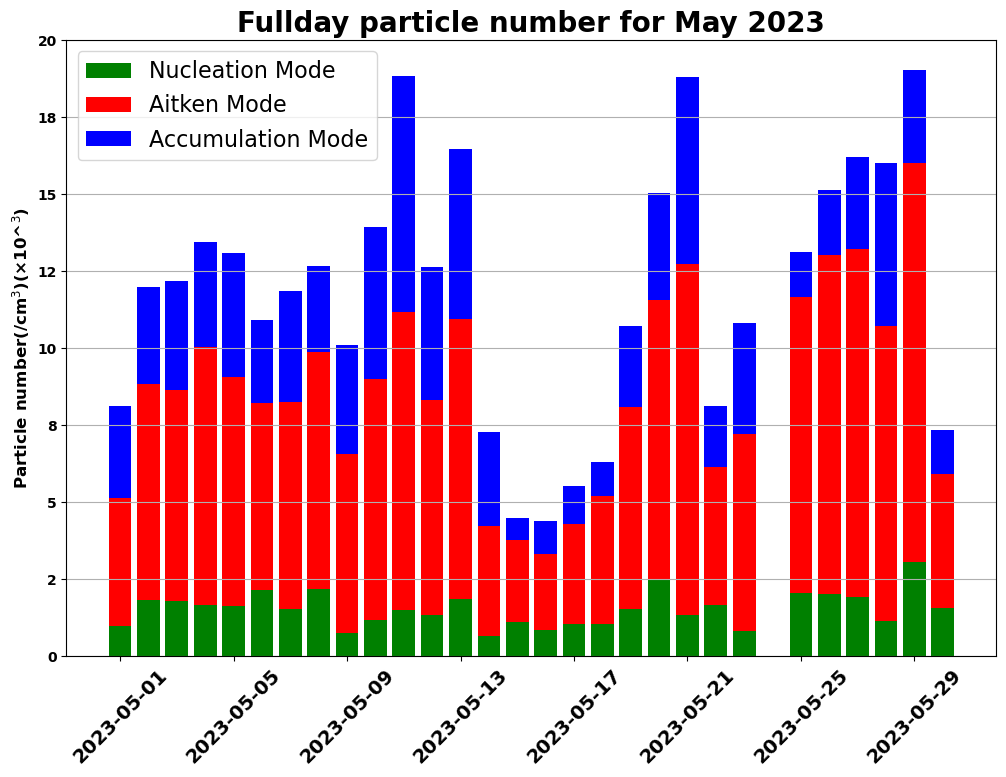

In [29]:
grouped_data = pd.DataFrame({
    'Nucleation': nucleation_sum,
    'Aitken': aitken_sum,
    'Accumulation': accumulation_sum
})
grouped_data = grouped_data.drop(grouped_data.index[-1])
plt.figure(figsize=(12, 8))
plt.bar(grouped_data.index, grouped_data['Nucleation'], label='Nucleation Mode', color='g')
plt.bar(grouped_data.index, grouped_data['Aitken'], bottom=grouped_data['Nucleation'], label='Aitken Mode', color='r')
plt.bar(grouped_data.index, grouped_data['Accumulation'], bottom=grouped_data['Nucleation'] + grouped_data['Aitken'], label='Accumulation Mode', color='b')

# Formatting the plot
plt.title('Fullday particle number for May 2023', fontsize=20, fontweight='bold')
plt.ylabel('Particle number(/cm$^3$)(×10^$^3$)', fontsize=12,fontweight='bold')
plt.ylim(0, 20000)  # Change this to 50 as you want the range 0-50
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}' ))
plt.xticks(rotation=45,fontsize=14, fontweight='bold')
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.legend(fontsize=16)
plt.grid(axis='y')
plt.savefig('F16.jpeg', dpi=600, bbox_inches='tight') 

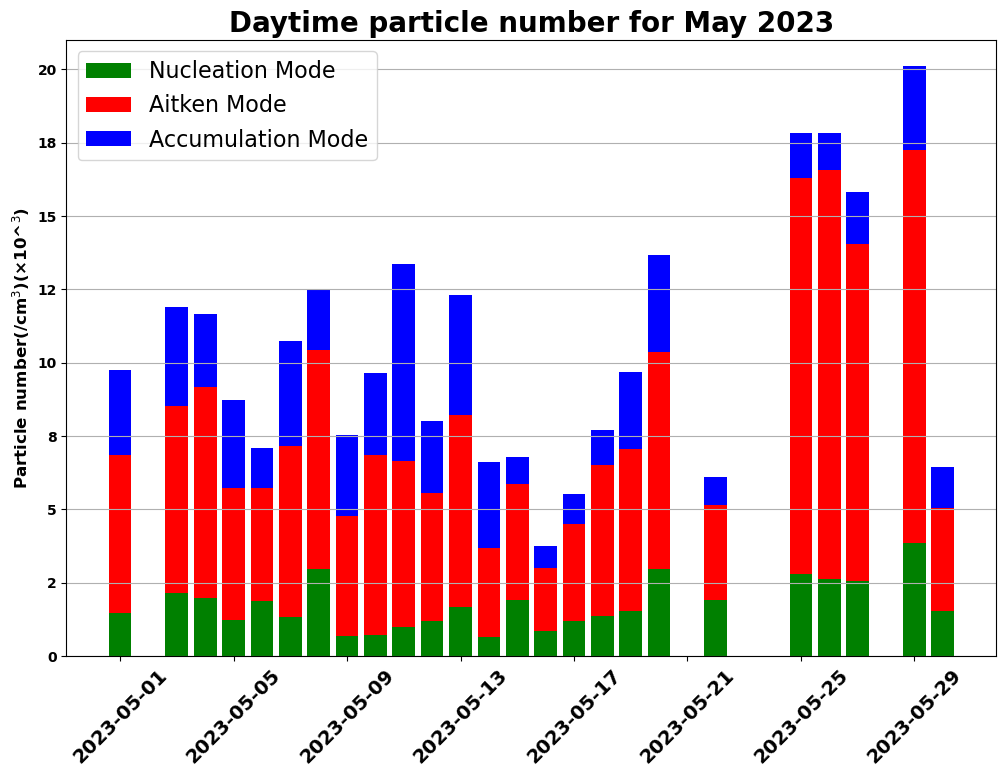

In [30]:
# File paths
nucleation_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/nucleation_day.csv'
aitken_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/aitken_day.csv'
accumulation_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/accumulation_day.csv'

# Read the data and parse dates
df_nucleation = pd.read_csv(nucleation_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_aitken = pd.read_csv(aitken_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_accumulation = pd.read_csv(accumulation_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)

# Rename and set 'DateTime' column as datetime index
df_nucleation.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_nucleation['DateTime'] = pd.to_datetime(df_nucleation['DateTime'])
df_nucleation.set_index('DateTime', inplace=True)

df_aitken.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_aitken['DateTime'] = pd.to_datetime(df_aitken['DateTime'])
df_aitken.set_index('DateTime', inplace=True)

df_accumulation.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_accumulation['DateTime'] = pd.to_datetime(df_accumulation['DateTime'])
df_accumulation.set_index('DateTime', inplace=True)


# Resample to daily frequency and calculate the daily mean of 'Sample Temp (C)'
daily_mean_nucleation = df_nucleation.resample('D').mean()
daily_mean_aitken = df_aitken.resample('D').mean()
daily_mean_accumulation = df_accumulation.resample('D').mean()

nucleation_sum = daily_mean_nucleation['Sum']
aitken_sum = daily_mean_aitken['Sum']
accumulation_sum = daily_mean_accumulation['Sum']


grouped_data = pd.DataFrame({
    'Nucleation': nucleation_sum,
    'Aitken': aitken_sum,
    'Accumulation': accumulation_sum
})
grouped_data = grouped_data.drop(grouped_data.index[-1])
plt.figure(figsize=(12, 8))
plt.bar(grouped_data.index, grouped_data['Nucleation'], label='Nucleation Mode', color='g')
plt.bar(grouped_data.index, grouped_data['Aitken'], bottom=grouped_data['Nucleation'], label='Aitken Mode', color='r')
plt.bar(grouped_data.index, grouped_data['Accumulation'], bottom=grouped_data['Nucleation'] + grouped_data['Aitken'], label='Accumulation Mode', color='b')

# Formatting the plot
plt.title('Daytime particle number for May 2023', fontsize=20, fontweight='bold')
plt.ylabel('Particle number(/cm$^3$)(×10^$^3$)', fontsize=12,fontweight='bold')
plt.ylim(0, 21000)  # Change this to 50 as you want the range 0-50
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}' ))
plt.xticks(rotation=45,fontsize=14, fontweight='bold')
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.legend(fontsize=16)
plt.grid(axis='y')
plt.savefig('F17.jpeg', dpi=600, bbox_inches='tight') 


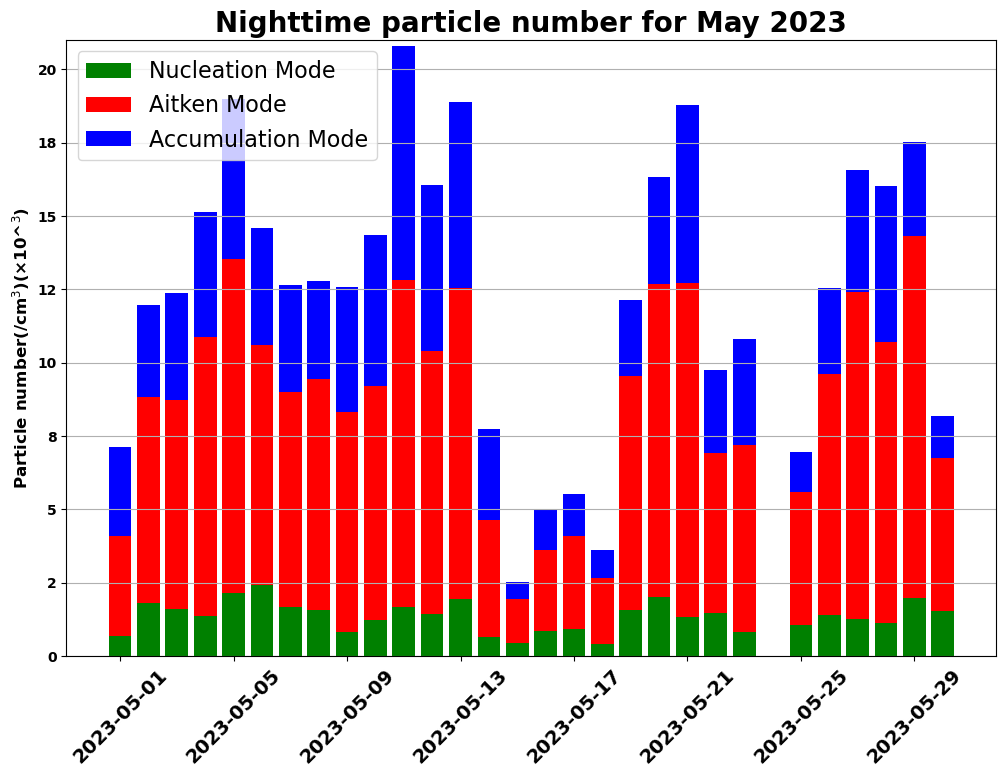

In [31]:
# File paths
nucleation_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/nucleation_night.csv'
aitken_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/aitken_night.csv'
accumulation_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/accumulation_night.csv'

# Read the data and parse dates
df_nucleation = pd.read_csv(nucleation_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_aitken = pd.read_csv(aitken_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_accumulation = pd.read_csv(accumulation_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)

# Rename and set 'DateTime' column as datetime index
df_nucleation.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_nucleation['DateTime'] = pd.to_datetime(df_nucleation['DateTime'])
df_nucleation.set_index('DateTime', inplace=True)

df_aitken.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_aitken['DateTime'] = pd.to_datetime(df_aitken['DateTime'])
df_aitken.set_index('DateTime', inplace=True)

df_accumulation.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_accumulation['DateTime'] = pd.to_datetime(df_accumulation['DateTime'])
df_accumulation.set_index('DateTime', inplace=True)


# Resample to daily frequency and calculate the daily mean of 'Sample Temp (C)'
daily_mean_nucleation = df_nucleation.resample('D').mean()
daily_mean_aitken = df_aitken.resample('D').mean()
daily_mean_accumulation = df_accumulation.resample('D').mean()

nucleation_sum = daily_mean_nucleation['Sum']
aitken_sum = daily_mean_aitken['Sum']
accumulation_sum = daily_mean_accumulation['Sum']


grouped_data = pd.DataFrame({
    'Nucleation': nucleation_sum,
    'Aitken': aitken_sum,
    'Accumulation': accumulation_sum
})
grouped_data = grouped_data.drop(grouped_data.index[-1])
plt.figure(figsize=(12, 8))
plt.bar(grouped_data.index, grouped_data['Nucleation'], label='Nucleation Mode', color='g')
plt.bar(grouped_data.index, grouped_data['Aitken'], bottom=grouped_data['Nucleation'], label='Aitken Mode', color='r')
plt.bar(grouped_data.index, grouped_data['Accumulation'], bottom=grouped_data['Nucleation'] + grouped_data['Aitken'], label='Accumulation Mode', color='b')

# Formatting the plot
plt.title('Nighttime particle number for May 2023', fontsize=20, fontweight='bold')
plt.ylabel('Particle number(/cm$^3$)(×10^$^3$)', fontsize=12,fontweight='bold')
plt.ylim(0, 21000)  # Change this to 50 as you want the range 0-50
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}' ))
plt.xticks(rotation=45,fontsize=14, fontweight='bold')
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.legend(fontsize=16)
plt.grid(axis='y')
plt.savefig('F18.jpeg', dpi=600, bbox_inches='tight') 

In [32]:
# data = pd.read_csv("smps_may.csv")
# base_columns = ["Date", "Start Time", "Sample Temp (C)", "Sample Pressure (kPa)", "Relative Humidity (%)"]

# # Convert numeric column names to float for easier filtering
# numeric_columns = [col for col in data.columns if col.replace('.', '', 1).isdigit()]
# numeric_columns = [col for col in numeric_columns if float(col) >= 6]  # Ensure numeric values start from 12

# # Separate columns based on the specified ranges
# d1 = data[base_columns + [col for col in numeric_columns if 6 <= float(col) <=100 ]]
# d2 = data[base_columns + [col for col in numeric_columns if 101 < float(col) <= 200]]
# d3 = data[base_columns + [col for col in numeric_columns if 201 < float(col) <= 300]]
# d4 = data[base_columns + [col for col in numeric_columns if 301 < float(col) <= 400]]
# d5 = data[base_columns + [col for col in numeric_columns if 401 < float(col) <= 500]]
# d6 = data[base_columns + [col for col in numeric_columns if 501 < float(col) <= 600]]
# d7 = data[base_columns + [col for col in numeric_columns if 601 < float(col) <= 700]]
# d8 = data[base_columns + [col for col in numeric_columns if 701 < float(col) <= 800]]
# d9 = data[base_columns + [col for col in numeric_columns if 801 < float(col) <= 900]]
# d10 = data[base_columns + [col for col in numeric_columns if 901 < float(col) <= 1000]]

# data_columns_d1 = d1.iloc[:, 5:]
# data_columns_d2 = d2.iloc[:, 5:]
# data_columns_d3 = d3.iloc[:, 5:]
# data_columns_d4 = d4.iloc[:, 5:]
# data_columns_d5 = d5.iloc[:, 5:]
# data_columns_d6 = d6.iloc[:, 5:]
# data_columns_d7 = d7.iloc[:, 5:]
# data_columns_d8 = d8.iloc[:, 5:]
# data_columns_d9 = d9.iloc[:, 5:]
# data_columns_d10 = d10.iloc[:, 5:]

# sum_values_night_d1 =  data_columns_d1.sum(axis=1)
# mean_values_night_d1 = data_columns_d1.mean(axis=1)
# std_dev_values_night_d1 = data_columns_d1.std(axis=1)

# sum_values_night_d2 =  data_columns_d2.sum(axis=1)
# mean_values_night_d2 = data_columns_d2.mean(axis=1)
# std_dev_values_night_d2 = data_columns_d2.std(axis=1)

# sum_values_night_d3 =  data_columns_d3.sum(axis=1)
# mean_values_night_d3 = data_columns_d3.mean(axis=1)
# std_dev_values_night_d3 = data_columns_d3.std(axis=1)

# d1['Sum'] = sum_values_night_d1
# d1['Mean'] = mean_values_night_d1
# d1['SD'] = std_dev_values_night_d1

# d2['Sum'] = sum_values_night_d2
# d2['Mean'] = mean_values_night_d2
# d2['SD'] = std_dev_values_night_d2

# d3['Sum'] = sum_values_night_d3
# d3['Mean'] = mean_values_night_d3
# d3['SD'] = std_dev_values_night_d3

# # Save each subset to a separate CSV file
# d1.to_csv('d1.csv', index=False)
# d2.to_csv('d2.csv', index=False)
# d3.to_csv('d3.csv', index=False)

In [33]:
# File paths
total_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/smps_may.csv'
df_total = pd.read_csv(total_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_total.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_total['DateTime'] = pd.to_datetime(df_total['DateTime'])
df_total.set_index('DateTime', inplace=True)
daily_mean_total = df_total.resample('D').mean()
daily_mean_total = daily_mean_total.reset_index()
daily_mean_total.to_csv('subhadeep.csv', index=False)

In [34]:
data = pd.read_csv("subhadeep.csv")
base_columns = ["DateTime", "Sample Temp (C)", "Sample Pressure (kPa)", "Relative Humidity (%)"]

# Convert numeric column names to float for easier filtering
numeric_columns = [col for col in data.columns if col.replace('.', '', 1).isdigit()]
numeric_columns = [col for col in numeric_columns if float(col) >= 4]  # Ensure numeric values start from 12

# Define ranges and initialize lists for results
ranges = [(6, 100), (101, 200), (201, 300), (301, 400), (401, 500), 
          (501, 600), (601, 700), (701, 800), (801, 900), (901, 1000)]
data_frames = []

# Iterate over the defined ranges
for lower, upper in ranges:
    subset = data[base_columns + [col for col in numeric_columns if lower < float(col) <= upper]]
    data_columns = subset.iloc[:, 4:]

    # Calculate sum, mean, and standard deviation
    subset['Sum'] = data_columns.sum(axis=1)
    subset['Mean'] = data_columns.mean(axis=1)
    subset['SD'] = data_columns.std(axis=1)

    # Save each subset to a separate CSV file
    data_frames.append((subset, f'd{len(data_frames) + 1}.csv'))

# Write to CSV
for df, filename in data_frames:
    df.to_csv(filename, index=False)


In [35]:
data = {}
for i in range(1, 11):  
    data[f'd{i}'] = pd.read_csv(f'd{i}.csv')['Sum']

grouped_data = pd.DataFrame(data)
grouped_data = grouped_data.drop(grouped_data.index[-1])
grouped_data = grouped_data.drop(columns=grouped_data.columns[-2:])
grouped_data

,d1,d2,d3,d4,d5,d6,d7,d8
0,5126.707682,2214.080271,599.602794,141.043075,30.374822,5.439561,0.000000,0.000000
1,8827.683648,2411.146133,571.445695,132.065171,30.477705,5.154467,0.000000,0.000000
2,8655.187732,2686.092277,661.492991,151.736043,32.897390,4.540026,0.057905,0.000000
3,10042.712748,2672.789526,581.122163,112.904693,24.069922,3.632570,0.000000,0.000000
4,9051.599865,3253.115865,651.954512,101.783106,19.371300,2.775465,0.000000,0.000000
5,8220.297480,2143.961000,456.128020,79.971400,19.379170,2.353590,0.000000,0.000000
6,8264.114457,2834.239636,646.281647,103.158884,21.111329,2.268410,0.000000,0.000000
7,9861.481119,2209.508181,498.244207,87.852256,21.683581,3.419004,0.875352,0.600348
8,6571.239347,2975.093658,473.472945,68.520789,14.312573,0.000000,0.000000,0.000000
9,9007.068062,4174.714903,656.309195,90.515628,18.357150,0.000000,0.000000,0.000000


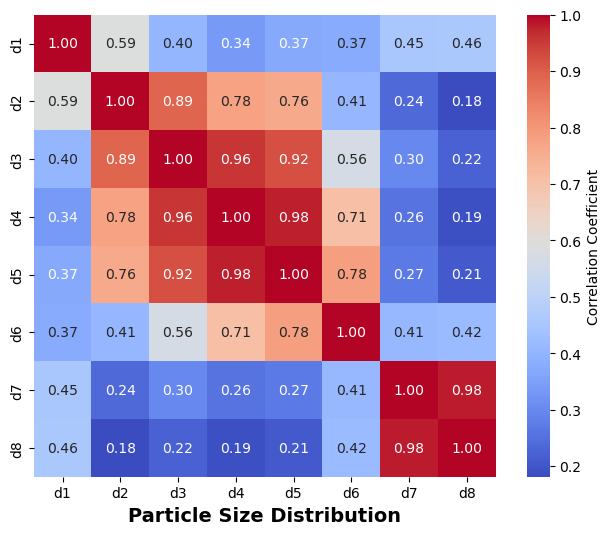

In [36]:
# Calculate the Pearson correlation matrix
correlation_matrix = grouped_data.corr(method='pearson')

plt.figure(figsize=(8, 6))

#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Create the heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={'label': 'Correlation Coefficient'})

# Add titles and labels
#plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xlabel('Particle Size Distribution', fontsize=14,fontweight='bold')
plt.savefig('F19.jpeg', dpi=600, bbox_inches='tight') 
plt.show()

In [37]:
#cmap_options = ['coolwarm', 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 
#                'YlGnBu', 'RdYlGn', 'BuPu', 'Spectral']

In [38]:
# File paths
total_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/nucleation.csv'
df_total = pd.read_csv(total_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_total.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_total['DateTime'] = pd.to_datetime(df_total['DateTime'])
df_total.set_index('DateTime', inplace=True)
daily_mean_total = df_total.resample('D').mean()
daily_mean_total = daily_mean_total.reset_index()
daily_mean_total.to_csv('subhadeep_nucl.csv', index=False)

In [39]:
# File paths
nucleation_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/nucleation.csv'
aitken_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/aitken.csv'
accumulation_data_may = '/home/subhadeep/Downloads/Subhadeep/Downloads/CVL720/accumulation.csv'

# Read the data and parse dates
df_nucleation = pd.read_csv(nucleation_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_aitken = pd.read_csv(aitken_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)
df_accumulation = pd.read_csv(accumulation_data_may, parse_dates=[['Date', 'Start Time']], dayfirst=True)

# Rename and set 'DateTime' column as datetime index
df_nucleation.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_nucleation['DateTime'] = pd.to_datetime(df_nucleation['DateTime'])
df_nucleation.set_index('DateTime', inplace=True)

df_aitken.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_aitken['DateTime'] = pd.to_datetime(df_aitken['DateTime'])
df_aitken.set_index('DateTime', inplace=True)

df_accumulation.rename(columns={'Date_Start Time': 'DateTime'}, inplace=True)
df_accumulation['DateTime'] = pd.to_datetime(df_accumulation['DateTime'])
df_accumulation.set_index('DateTime', inplace=True)


# Resample to daily frequency and calculate the daily mean of 'Sample Temp (C)'
daily_mean_nucleation = df_nucleation.resample('D').mean()
daily_mean_aitken = df_aitken.resample('D').mean()
daily_mean_accumulation = df_accumulation.resample('D').mean()

nucleation_sum = daily_mean_nucleation['GeoMean']
aitken_sum = daily_mean_aitken['GeoMean']
accumulation_sum = daily_mean_accumulation['GeoMean']

In [40]:
daily_mean_nucleation

,Sample Temp (C),Sample Pressure (kPa),Relative Humidity (%),12.2,12.6,13.1,13.6,14.1,14.6,15.1,...,Sum,Mean,SD,GeoMean,GeoStdDev,Percentile_10,Percentile_25,Percentile_50,Percentile_75,Percentile_90
DateTime,,,,,,,,,,,,,,,,,,,,,
2023-05-01,22.500935,93.485047,42.570093,NaN,NaN,NaN,NaN,28.409654,31.747187,36.371879,...,972.906449,57.229791,19.235783,53.369718,1.440429,33.102325,43.007056,57.434617,72.477477,79.954221
2023-05-02,24.866667,93.584762,39.823810,NaN,NaN,NaN,NaN,50.980524,58.234295,65.102848,...,1808.195962,106.364468,35.068658,99.457535,1.429598,61.476560,79.474905,107.741343,135.706562,147.626200
2023-05-03,22.107359,93.578355,44.856710,NaN,NaN,NaN,NaN,47.615476,54.416403,63.115091,...,1806.310290,106.253546,37.731461,98.380691,1.500995,58.337278,77.507948,107.664411,135.404615,151.268332
2023-05-04,22.292593,93.422222,41.981481,NaN,NaN,NaN,NaN,41.704400,47.130100,53.849189,...,1660.749556,97.691150,38.556327,89.153091,1.594007,50.674128,66.266030,97.362096,127.342507,146.157417
2023-05-05,22.458824,93.029412,40.829412,NaN,NaN,NaN,NaN,39.809429,44.785124,51.191447,...,1624.809588,95.577035,39.091907,86.627075,1.521022,47.760165,64.406865,94.806182,125.944282,144.730539
2023-05-06,24.630000,92.575000,33.350000,NaN,NaN,NaN,NaN,66.528920,75.265380,83.553760,...,2149.167330,126.421608,37.898367,119.736735,1.409184,76.854450,96.508600,130.644040,156.930125,170.718264
2023-05-07,24.062428,92.405780,35.721387,NaN,NaN,NaN,NaN,40.884098,45.866139,51.601156,...,1523.176335,89.598608,33.421227,82.632711,1.501370,48.882887,62.625925,89.347509,114.456509,131.734895
2023-05-08,23.789427,92.377974,37.097797,NaN,NaN,NaN,NaN,57.878423,65.287930,74.334524,...,2183.159423,128.421143,47.902069,118.405211,1.550479,69.379240,90.347529,128.291903,166.046489,188.102269
2023-05-09,23.749749,91.446231,28.293467,NaN,NaN,NaN,NaN,24.399548,27.715090,31.407663,...,757.332111,44.548948,16.995539,40.860345,1.490171,25.295808,30.693116,42.840884,56.702035,66.161424


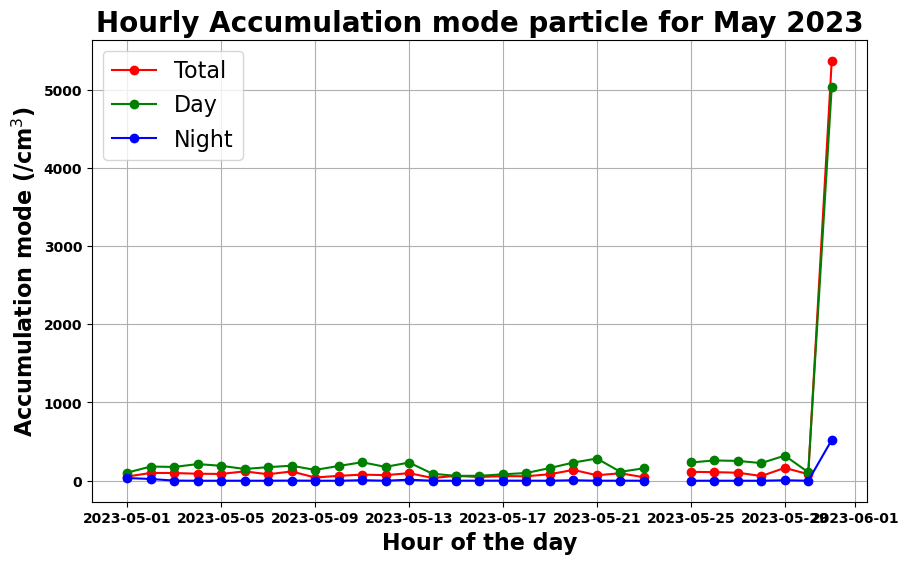

In [41]:
# Plotting both day and night data on a single plot
plt.figure(figsize=(10, 6))
plt.plot(nucleation_sum.index, nucleation_sum.values, marker='o', linestyle='-', color='r', label='Total')
plt.plot(aitken_sum.index, aitken_sum.values, marker='o', linestyle='-', color='g', label='Day')
plt.plot(accumulation_sum.index, accumulation_sum.values, marker='o', linestyle='-', color='b', label='Night')

#plt.xticks(range(24), fontsize=14, fontweight='bold')
plt.xlabel('Hour of the day', fontsize=16, fontweight='bold')
plt.ylabel('Accumulation mode (/cm$^3$)', fontsize=16, fontweight='bold')
plt.title('Hourly Accumulation mode particle for May 2023', fontsize=20, fontweight='bold')
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.legend(fontsize=16)
plt.grid(True)
plt.savefig('F20.jpeg', dpi=600, bbox_inches='tight') 
plt.show()